In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [3]:
df_s = pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")
df_s.head(5)

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


**Data Information**

In [4]:
# information
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      180 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


In [5]:
# Data Statistics
df_s.describe()

,Rank,Year Built,Points,Year of Rank
count,180.000000,180.000000,180.000000,180.000000
mean,22.127778,2004.655556,325.433333,2016.500000
std,15.186377,9.511723,279.650322,1.388299
min,1.000000,1976.000000,59.000000,2013.000000
25%,8.000000,2000.000000,112.250000,2016.000000
50%,20.500000,2006.000000,246.000000,2017.000000
75%,35.250000,2012.000000,427.000000,2018.000000
max,50.000000,2018.000000,1354.000000,2018.000000


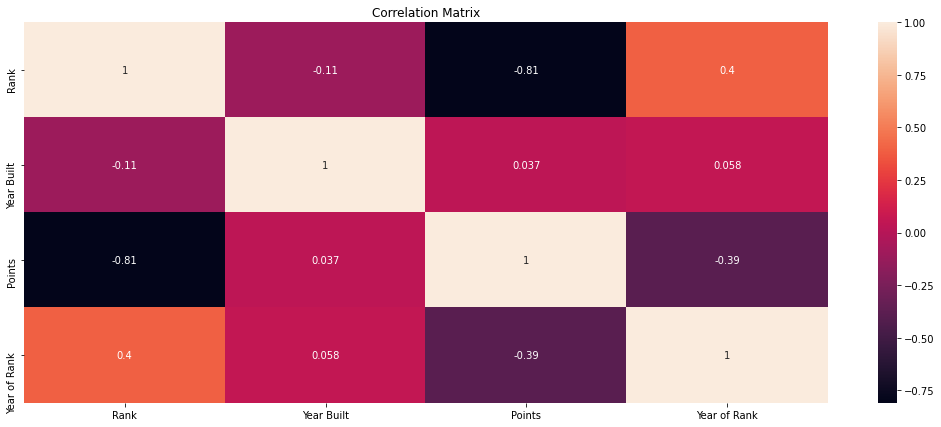

In [6]:
# Correlation
plt.figure(figsize = (18, 7))
correlation = df_s.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation Matrix")
plt.show()

### Analysis

**10 Swings by Frequency**

In [7]:
dr = df_s["Name"].value_counts().to_frame().reset_index()
dr.columns = ["Swing", "Frequency"]
dr.head(10)

,Swing,Frequency
0,Goliath,8
1,Expedition GeForce,6
2,Millennium Force,6
3,Apollo’s Chariot,6
4,New Texas Giant,6
5,Intimidator,6
6,Nitro,6
7,Leviathan,5
8,Fury 325,4
9,Diamondback,4


**10 Swings in Parks by Frequency**

In [8]:
df_p = df_s["Park"].value_counts().to_frame().reset_index()
df_p.columns = ["Park", "Swings"]
df_p.head(10)

,Park,Swings
0,Cedar Point,19
1,Busch Gardens Williamsburg,12
2,Carowinds,10
3,Busch Gardens Tampa,9
4,Six Flags New England,9
5,Six Flags Over Georgia,8
6,Canada’s Wonderland,8
7,Six Flags Magic Mountain,7
8,Six Flags Over Texas,7
9,Six Flags Great Adventure,7


**10 Swings in Location by Frequency**

In [9]:
df_l = df_s["Location"].value_counts().to_frame().reset_index()
df_l.columns = ["Location", "Swings"]
df_l.head(10)

,Location,Swings
0,"Sandusky, Ohio",19
1,"Williamsburg, Va.",12
2,"Charlotte, N.C.",10
3,"Tampa, Fla.",9
4,"Agawam, Mass.",9
5,"Austell, Ga.",8
6,"Arlington, Texas",7
7,"Valencia, Calif.",7
8,"Mason, Ohio",7
9,"Vaughan, Ontario, Canada",7


**Swings from Supplier Supplier by Frequency**

In [10]:
df_f = df_s["Supplier"].value_counts().to_frame().reset_index()
df_f.columns = ["Supplier", "Swings"]
df_f

,Supplier,Swings
0,B&M,77
1,Intamin,37
2,RMC,12
3,Schwarzkopf,11
4,Rocky Mountain,10
5,Mack,9
6,Arrow,7
7,Morgan,4
8,Lagoon,3
9,Vekoma,3


**Swings Built by Year**

In [11]:
df_y = df_s["Year Built"].value_counts().to_frame().reset_index()
df_y.columns = ["Year Built", "Swings"]
df_y

,Year Built,Swings
0,2015,16
1,2006,16
2,2001,16
3,2000,13
4,2014,10
5,2012,10
6,2010,10
7,1999,10
8,2016,9
9,2011,9


**10 Points given to Swings by Frequency**

In [12]:
df_p = df_s["Points"].value_counts().to_frame().reset_index()
df_p.columns = ["Points", "Swings"]
df_p.head(10)

,Points,Swings
0,78,4
1,72,4
2,92,3
3,99,3
4,122,2
5,283,2
6,330,2
7,68,2
8,175,2
9,81,2


**Swings Ranked by Year**

In [13]:
df_sr = df_s["Year of Rank"].value_counts().to_frame().reset_index()
df_sr

,index,Year of Rank
0,2018,50
1,2017,50
2,2016,50
3,2015,10
4,2014,10
5,2013,10


### Deep Analysis

**Most Swings by Park**

In [14]:
sp = df_s.groupby(["Park", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
sp = sp.drop_duplicates("Park", keep = "first")
sp.columns = ["Park", "Swing", "Count"]
sp

,Park,Swing,Count
11,Carowinds,Intimidator,6
49,Six Flags Great Adventure,Nitro,6
26,Holiday Park,Expedition GeForce,6
15,Cedar Point,Millennium Force,6
5,Busch Gardens Williamsburg,Apollo’s Chariot,6
62,Six Flags Over Texas,New Texas Giant,6
9,Canada’s Wonderland,Leviathan,5
60,Six Flags Over Georgia,Goliath,5
35,Kings Island,Diamondback,4
0,Alton Towers,Nemesis,4


**Most Swings by Location**

In [15]:
sl = df_s.groupby(["Location", "Name"])["Name"].agg(["count"]).sort_values(by = "count", ascending = False).reset_index()
sl = sl.drop_duplicates("Location", keep = "first")
sl.columns = ["Location", "Name", "Swings"]
sl

,Location,Name,Swings
0,"Sandusky, Ohio",Millennium Force,6
1,"Hassloch, Germany",Expedition GeForce,6
2,"Williamsburg, Va.",Apollo’s Chariot,6
3,"Jackson, N.J.",Nitro,6
4,"Arlington, Texas",New Texas Giant,6
5,"Charlotte, N.C.",Intimidator,6
6,"Austell, Ga.",Goliath,5
7,"Staffordshire, England",Nemesis,4
10,"Mason, Ohio",Diamondback,4
11,"Vaughan, Ontario, Canada",Leviathan,4


**Most Swings by Supplier**

In [16]:
ss = df_s.groupby(["Supplier", "Name"])["Name"].agg(["count"]).sort_values(by = "count", ascending = False).reset_index()
ss = ss.drop_duplicates("Supplier", keep = "first")
ss.columns = ["Supplier", "Swing", "Count"]
ss

,Supplier,Swing,Count
0,B&M,Goliath,8
1,Intamin,Millennium Force,6
8,Rocky Mountain,New Texas Giant,4
9,Arrow,Magnum XL-200,4
18,Lagoon,Cannibal,3
19,Mack,Blue Fire,3
23,Vekoma,Expedition Everest,3
29,Schwarzkopf,Mind Bender,3
34,Morgan,Phantom’s Revenge,2
36,RMC,New Texas Giant,2


**Most Swings built by Year**

In [17]:
sy = df_s.groupby(["Year Built", "Name"])["Name"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
sy = sy.drop_duplicates("Year Built", keep = "first")
sy.columns = ["Year Built", "Swing", "Count"]
sy

,Year Built,Swing,Count
31,2006,Goliath,8
42,2011,New Texas Giant,6
23,2001,Nitro,6
38,2010,Intimidator,6
18,2000,Millennium Force,6
14,1999,Apollo’s Chariot,6
43,2012,Leviathan,5
56,2015,Fury 325,4
37,2009,Diamondback,4
8,1994,Nemesis,4


**10 Highest Points by Swings**

In [18]:
ps = df_s.sort_values(by = "Points", ascending = False).head(10)
ps

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
80,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1354,2017
130,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1222,2018
20,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1205,2015
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
131,2,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1156,2018
10,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1139,2014
81,2,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1129,2017
30,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1126,2016
31,2,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1122,2016
11,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1049,2014


**Number of Swings by Location**

In [19]:
pl = df_s.groupby(["Location", "Name"])["Name"].agg(["count"]).sort_values(by = "count", ascending = False).reset_index()
pl = pl.drop_duplicates("Location", keep = "first")
pl.columns = ["Location", "Name", "Swings"]
pl

,Location,Name,Swings
0,"Sandusky, Ohio",Millennium Force,6
1,"Hassloch, Germany",Expedition GeForce,6
2,"Williamsburg, Va.",Apollo’s Chariot,6
3,"Jackson, N.J.",Nitro,6
4,"Arlington, Texas",New Texas Giant,6
5,"Charlotte, N.C.",Intimidator,6
6,"Austell, Ga.",Goliath,5
7,"Staffordshire, England",Nemesis,4
10,"Mason, Ohio",Diamondback,4
11,"Vaughan, Ontario, Canada",Leviathan,4


**Swings in Location built by Year**

In [20]:
ly = df_s.groupby(["Year Built", "Location"])["Location"].agg(["count"]).sort_values(by = "count", ascending = False).reset_index()
ly.columns = ["Year", "Location", "Swings"]
ly.head(20)

,Year,Location,Swings
0,1999,"Williamsburg, Va.",6
1,2010,"Charlotte, N.C.",6
2,2001,"Jackson, N.J.",6
3,2001,"Hassloch, Germany",6
4,2011,"Arlington, Texas",6
5,2000,"Sandusky, Ohio",6
6,2000,"Agawam, Mass.",6
7,2006,"Austell, Ga.",5
8,2009,"Mason, Ohio",4
9,1989,"Sandusky, Ohio",4


**Highest Number of Swings Rank by Location**

In [21]:
sr = df_s.groupby(["Location", "Year of Rank"])["Year of Rank"].agg(["count"]).sort_values(by = "count", ascending = False).reset_index()
sr = sr.drop_duplicates("Year of Rank", keep = "first")
sr.columns = ["Location", "Year of Rank", "Ranks"]
sr

,Location,Year of Rank,Ranks
0,"Sandusky, Ohio",2016,6
1,"Sandusky, Ohio",2018,5
3,"Sandusky, Ohio",2017,4
20,"Sandusky, Ohio",2013,2
39,"Charlotte, N.C.",2015,2
58,"Austell, Ga.",2014,1


**Top Suppliers by Year**

In [22]:
sy = df_s.groupby(["Year Built", "Supplier"])["Supplier"].agg(["count"]).sort_values(by = "count", ascending = False).reset_index()
sy = sy.drop_duplicates("Year Built", keep = "first")
sy

,Year Built,Supplier,count
0,2000,Intamin,13
1,2006,B&M,11
2,1999,B&M,10
3,2015,B&M,7
4,2012,B&M,7
5,2001,B&M,6
6,2010,B&M,6
8,1994,B&M,5
9,2011,Rocky Mountain,4
10,1978,Schwarzkopf,4


**Top Supplier by Points**

In [23]:
sp = df_s.sort_values(by = "Points", ascending = False)
sp.head(10)

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
80,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1354,2017
130,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1222,2018
20,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1205,2015
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
131,2,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1156,2018
10,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1139,2014
81,2,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1129,2017
30,1,Fury 325,Carowinds,"Charlotte, N.C.",B&M,2015,1126,2016
31,2,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1122,2016
11,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1049,2014


**Top Supplier by Year**

In [28]:
sy = df_s.groupby(["Supplier", "Year of Rank"])["Year of Rank"].agg(["count"]).sort_values(by = "count", ascending = False).reset_index()
sy = sy.drop_duplicates("Year of Rank", keep = "first")
sy

,Supplier,Year of Rank,count
0,B&M,2016,22
1,B&M,2018,20
2,B&M,2017,19
7,B&M,2015,6
8,B&M,2014,6
13,Intamin,2013,4


**Higher Ranking by Year of Individual Suppliers**

In [31]:
sr = df_s.groupby(["Supplier", "Year of Rank"])["Year of Rank"].agg(["count"]).sort_values(by = "count", ascending = False).reset_index()
sr = sr.drop_duplicates("Supplier", keep = "first")
sr

,Supplier,Year of Rank,count
0,B&M,2016,22
3,Intamin,2018,10
6,Rocky Mountain,2018,7
9,RMC,2017,6
11,Schwarzkopf,2017,4
17,Mack,2018,3
21,Arrow,2016,2
23,Morgan,2016,2
26,Vekoma,2017,1
29,Schwarz,2017,1


**Points Statistics by Year**

In [34]:
ps = df_s.groupby("Year Built")["Points"].agg(["min", "mean", "max"]).sort_values(by = "max", ascending = False)
ps

,min,mean,max
Year Built,,,
2015,72,398.812500,1354
2000,99,921.615385,1205
2018,109,395.333333,829
2001,162,500.812500,764
2013,59,305.000000,657
1999,74,330.300000,597
2009,244,376.200000,579
2011,97,301.111111,512
2012,89,299.500000,500
